<a href="https://colab.research.google.com/github/AlenaResiko/Project_curvature/blob/main/Estimate_curvature_4_Dec_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx
import pickle
import statistics

import random

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!pip install POT
import ot

/usr/local/lib/python3.10/dist-packages/ot/backend.py:2998: UserWarning: To use TensorflowBackend, you need to activate the tensorflow numpy API. You can activate it by running: 
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
  register_backend(TensorflowBackend())


### Functions

In [7]:
# Distribute uniform probabilities among vertices that are <= delta away from nodes n
def distribute_probabilities(D, n1, delta): # delta is ball radius - set it a bit greater than connection threshold
  probabilities = np.zeros(n_points)
  count = 0
  for n2 in range(n_points):
    if D[n1][n2]<delta and n1!=n2:
      probabilities[n2] = 1
      count += 1
  if count>0:
    probabilities /= count
    return probabilities
  else:
      print("Node ", n1, " has degree 0.")
      return np.zeros(n_points)

In [8]:
def findEdgeOTDist(D, n1, n2):
  if D[n1][n2] > epsilon:
    return 0
  n1_prob = distribute_probabilities(D=D, n1=n1, delta=D[n1][n2])
  n2_prob = distribute_probabilities(D=D, n1=n2, delta=D[n1][n2])
  if n1_prob.any() and n2_prob.any():
    return ot.emd2(n1_prob, n2_prob, D)
  else:
    print("Tried to compute edge over nodes with 0 probabilities.")
    return 0

In [9]:
# def findOTDist(D): # epsilon was connection threshold
#   D_OT = np.zeros((n_points, n_points))
#   for n1 in range(10):
#     for n2 in range(n_points):
#       if D[n1][n2] < epsilon and n1!=n2: # n2 is neighbor of n1
#         Wd = findEdgeOTDist(D=D, n1=n1, n2=n2)
#         D_OT[n1][n2] = Wd
#         print(Wd)
#         print("Finished edge between nodes number ", n1, " and ", n2)
#   return D_OT

In [28]:
def curvature_random_edges(count, n_points, G, D):
  edge_curvatures = np.zeros((n_points, n_points))
  for _ in range(count):
    n1 = random.randint(0, n_points)
    ind = random.randint(0, G.degree(n1)-1)
    n2 = list(G.neighbors(n1))[ind]
    Wd = findEdgeOTDist(D=D, n1=n1, n2=n2)
    print("Wasserstein distance: ", Wd)
    print("Geodesic distance: ", D[n1][n2])
    edge_curvatures[n1][n2] = 1 - Wd/D[n1][n2]
    print("Curvature of edge between " + str(n1) + " and " + str(n2) + " is " + str(edge_curvatures[n1][n2]))
  return edge_curvatures

In [49]:
def display_curvatures(c):
  c_processed = c.flatten()
  data = c_processed[np.where(c_processed!=0)]
  plt.hist(data, bins=30, color='skyblue', edgecolor='black')
  plt.xlabel('Curvatures')
  plt.ylabel('Frequency')
  plt.title('Edge curvatures Histogram')
  plt.show()

  print("Stats: ")
  print("Sampled ", len(data), " edges.")
  print("Mean: ", data.mean())
  print("Std: ", data.std())

#### Sphere

In [13]:
n_points = 3162
epsilon = 1/n_points**(0.16)
print(n_points, epsilon)

3162 0.2754267398412311


In [14]:
G_S = pickle.load(open("/content/drive/MyDrive/Curvature Project/Graphs_0/G_S_2d.pickle", 'rb'))
print("G loaded - ", G_S)
D_S = np.load('/content/drive/MyDrive/Curvature Project/Graphs_0/D_S_2d.npy')
print("D loaded - ", D_S)

G loaded -  Graph with 3162 nodes and 94299 edges
D loaded -  [[0.         0.95480812 0.86371887 ... 2.37759782 1.50053148 2.21196589]
 [0.95480812 0.         0.60239247 ... 2.84372703 1.62959806 1.26551939]
 [0.86371887 0.60239247 0.         ... 2.37917726 1.04868747 1.45847948]
 ...
 [2.37759782 2.84372703 2.37917726 ... 0.         1.33394139 1.63568555]
 [1.50053148 1.62959806 1.04868747 ... 1.33394139 0.         1.58569016]
 [2.21196589 1.26551939 1.45847948 ... 1.63568555 1.58569016 0.        ]]


In [37]:
count = 300
c = curvature_random_edges(count=count, n_points=n_points, G=G_S, D=D_S)

Wasserstein distance:  0.18005047226289417
Geodesic distance:  0.17992932734770553
Curvature of edge between 2374 and 263 is -0.0006732916583105375
Wasserstein distance:  0.1804073568412747
Geodesic distance:  0.1637166961329988
Curvature of edge between 2840 and 1755 is -0.10194843349829696
Wasserstein distance:  0.15536959186870525
Geodesic distance:  0.13427045296187157
Curvature of edge between 2281 and 1142 is -0.15713910574819567
Wasserstein distance:  0.16068098272780654
Geodesic distance:  0.1764780554907596
Curvature of edge between 14 and 2067 is 0.0895129579653613
Wasserstein distance:  0.2721224136038346
Geodesic distance:  0.2364170191850615
Curvature of edge between 3039 and 1096 is -0.15102717453189696
Wasserstein distance:  0.12824949664943805
Geodesic distance:  0.15129050654045936
Curvature of edge between 503 and 379 is 0.15229646868066704
Wasserstein distance:  0.12029933882797193
Geodesic distance:  0.14930034204753273
Curvature of edge between 2885 and 802 is 0.19

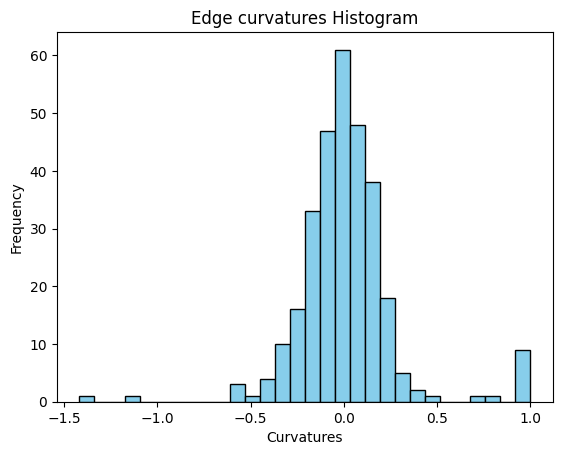

Stats: 
Sampled  300  edges.
Mean:  0.009860018063586003
Std:  0.2685358882972893


In [50]:
display_curvatures(c)

#### Flat Torus

In [51]:
n_points = 3162
epsilon = 1/n_points**(0.16)
print(n_points, epsilon)

3162 0.2754267398412311


In [52]:
G_FT = pickle.load(open("/content/drive/MyDrive/Curvature Project/Graphs_0/G_FT.pickle", 'rb'))
print("G loaded", G_FT)
D_FT = np.load('/content/drive/MyDrive/Curvature Project/Graphs_0/D_FT.npy')
print("D loaded - ", D_FT)

G loaded Graph with 3162 nodes and 1190613 edges
D loaded -  [[0.         0.4067369  0.36518773 ... 0.65806853 0.35885055 0.29122129]
 [0.4067369  0.         0.42252431 ... 0.30894379 0.28006836 0.30679959]
 [0.36518773 0.42252431 0.         ... 0.32499448 0.14928871 0.12304432]
 ...
 [0.65806853 0.30894379 0.32499448 ... 0.         0.44901266 0.44675745]
 [0.35885055 0.28006836 0.14928871 ... 0.44901266 0.         0.07675087]
 [0.29122129 0.30679959 0.12304432 ... 0.44675745 0.07675087 0.        ]]


In [ ]:
delta = 0.25
dist_prob_node_0 = distribute_probabilities(D_FT, 0, delta)
print(dist_prob_node_0[:100])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00155763 0.         0.         0.         0.         0.
 0.00155763 0.         0.00155763 0.         0.         0.
 0.00155763 0.         0.00155763 0.00155763 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00155763 0.00155763 0.         0.         0.         0.
 0.00155763 0.         0.         0.         0.         0.
 0.         0.00155763 0.         0.         0.         0.
 0.         0.         0.         0.         0.00155763 0.
 0.         0.         0.00155763 0.         0.00155763 0.
 0.00155763 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00155763
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00155763]


In [ ]:
OT_FT_0_to_10 = findOTDist(D_FT)

Streaming output truncated to the last 5000 lines.
Finished edge between nodes number  5  and  340
0.13780456973695457
Finished edge between nodes number  5  and  342
0.11749850099456288
Finished edge between nodes number  5  and  344
0.08623169794575528
Finished edge between nodes number  5  and  348
0.22184682898773117
Finished edge between nodes number  5  and  352
0.1168431428864847
Finished edge between nodes number  5  and  376
0.09960411917000135
Finished edge between nodes number  5  and  377
0.20236841517759893
Finished edge between nodes number  5  and  384
0.0860655798191208
Finished edge between nodes number  5  and  387
0.13122816683764174
Finished edge between nodes number  5  and  396
0.2104064611597792
Finished edge between nodes number  5  and  401
0.21301293062758692
Finished edge between nodes number  5  and  404
0.09024466831555425
Finished edge between nodes number  5  and  414
0.08472546467155471
Finished edge between nodes number  5  and  418
0.1935205999437636
F

In [ ]:
print(OT_FT_0_to_10[0][:100])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.14038845 0.         0.21401716 0.         0.         0.
 0.21259202 0.         0.21805028 0.20625686 0.         0.
 0.         0.         0.         0.         0.         0.
 0.18509731 0.21225341 0.         0.         0.         0.
 0.06213574 0.         0.         0.         0.         0.
 0.         0.02876318 0.         0.         0.         0.
 0.         0.         0.         0.         0.13041062 0.
 0.         0.         0.1343518  0.         0.08881876 0.
 0.15431015 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.11407072
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.15029801]


In [ ]:
# computer curvature of edges with node 0
K = np.zeros((n_points, n_points))
for n1 in range(10):
  for n2 in range(n_points):
    if OT_FT_0_to_10[n1][n2] != 0:
      K[n1][n2] = 1 - OT_FT_0_to_10[n1][n2]/D_FT[n1][n2]

for i in range(10):
  print("Node ", i)
  print(K[i][:260])
  print("Sum of curvatures over edges of node ", i, " = ", K[i].sum())

Node  0
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.10491418  0.          0.00884178  0.          0.          0.
  0.06016768  0.         -0.04067623  0.02827421  0.          0.
  0.          0.          0.          0.          0.          0.
  0.02344049  0.05811685  0.          0.          0.          0.
  0.09279719  0.          0.          0.          0.          0.
  0.          0.31684832  0.          0.          0.          0.
  0.          0.          0.          0.         -0.03968244  0.
  0.          0.         -0.03490282  0.          0.02651131  0.
  0.05002518  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.08132881
  0.     

In [ ]:
K.sum()

52.80042450804892

In [ ]:
edge_curavtures = np.zeros(10)
for i in range(10):
  edge_curavtures[i] = K[i].sum

# Plot the histogram of edge curvatures
plt.subplot(2, 1, 1)
plt.hist(edge_curvatures,bins=30)
plt.xlabel('Ricci curvature')
plt.title("Histogram of Ricci Curvatures")

# Plot the histogram of edge weights
plt.subplot(2, 1, 2)
weights = nx.get_edge_attributes(G_orc, "weight").values()
plt.hist(weights,bins=20)
plt.xlabel('Edge weight')
plt.title("Histogram of Edge weights")
plt.tight_layout()

#### Poincare disk

In [6]:
G_P = pickle.load(open("/content/drive/MyDrive/Curvature Project/Graphs_0/G_P_10000.pickle", 'rb'))
print("G loaded")
print(G_P)
D_P = np.load('/content/drive/MyDrive/Curvature Project/Graphs_0/D_P_10000.npy')
print(D_P)

G loaded
Graph with 10000 nodes and 2193145 edges
[[0.         1.07346222 1.2341758  ... 1.6909365  1.21734802 1.54532823]
 [1.07346222 0.         0.41460042 ... 0.62488281 0.38177256 1.01654571]
 [1.2341758  0.41460042 0.         ... 0.62699677 0.03291857 0.62169823]
 ...
 [1.6909365  0.62488281 0.62699677 ... 0.         0.61340029 1.16586657]
 [1.21734802 0.38177256 0.03291857 ... 0.61340029 0.         0.65279186]
 [1.54532823 1.01654571 0.62169823 ... 1.16586657 0.65279186 0.        ]]


In [ ]:
epsilon=1/(10000**(0.16))
print(epsilon)

delta = 0.25
dist_prob_node_0 = distribute_probabilities(D_P, 0, delta)
print(dist_prob_node_0[:100])

OT_FT_0_to_10 = findOTDist(D_P)

0.2290867652767773
[0.         0.         0.         0.00552486 0.         0.
 0.         0.         0.         0.         0.00552486 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00552486 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00552486 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00552486 0.         0. 

In [ ]:
K = np.zeros((n_points, n_points))
for n1 in range(10):
  for n2 in range(n_points):
    if OT_FT_0_to_10[n1][n2] != 0:
      K[n1][n2] = 1 - OT_FT_0_to_10[n1][n2]/D_FT[n1][n2]

for i in range(10):
  print("Node ", i)
  print(K[i][:260])
  print("Sum of curvatures over edges of node ", i, " = ", K[i].sum())

Node  0
[ 0.          0.          0.          0.79823454  0.          0.
  0.          0.          0.          0.          0.50645626  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.80414593  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.82755421  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0. 

In [ ]:
K.sum()

653.6786282931447

##### Compute curvature of random edges

In [12]:
n_points = 10000
epsilon = 1/n_points**(0.16)

In [ ]:
# D_OT = np.zeros((3162, 3162))
#   for n1 in range(10):
#     for n2 in range(3162):
#       if D[n1][n2] < epsilon and n1!=n2: # n2 is neighbor of n1
#         Wd = findEdgeOTDist(D=D, n1=n1, n2=n2)
#         D_OT[n1][n2] = Wd
#         print(Wd)
#         print("Finished edge between nodes number ", n1, " and ", n2)

c = np.zeros((n_points, n_points))
for _ in range(500):
  n1 = random.randint(0, n_points)
  ind = random.randint(0, G_P.degree(n1))
  n2 = list(G_P.neighbors(n1))[ind]
  Wd = findEdgeOTDist(D=D_P, n1=n1, n2=n2)
  print("Wasserstein distance: ", Wd)
  print("Geodesic distance: ", D_P[n1][n2])
  c[n1][n2] = 1 - Wd/D_P[n1][n2]
  print("Curvature of edge between " + str(n1) + " and " + str(n2) + " is " + str(c[n1][n2]))

Wasserstein distance:  0.17357953910725687
Geodesic distance:  0.17285127186859875
Curvature of edge between 5590 and 1220 is -0.00421325935751149
Wasserstein distance:  0.21258319965348269
Geodesic distance:  0.20731830392204342
Curvature of edge between 3736 and 6353 is -0.02539522865004229
Wasserstein distance:  0.052620889435389825
Geodesic distance:  0.06668671212732809
Curvature of edge between 5909 and 7494 is 0.21092391937214905
Wasserstein distance:  0.14005584787508968
Geodesic distance:  0.195936651318613
Curvature of edge between 7534 and 9352 is 0.28519831826999753
Wasserstein distance:  0.1362760298248369
Geodesic distance:  0.22302368469752273
Curvature of edge between 439 and 4362 is 0.3889616252656658
Wasserstein distance:  0.18582254773933787
Geodesic distance:  0.1892404669630285
Curvature of edge between 1096 and 243 is 0.018061249153218162
Wasserstein distance:  0.08301864773082371
Geodesic distance:  0.13528706280096134
Curvature of edge between 4953 and 4790 is 0

In [25]:
print(c.sum())

21.731010790759807


In [ ]:
compute Wd for first 100 nodes
compare sum of edge curvatures for each node
3. compare histrogram/averages between manifolds (a sphere, flat torus, poincare disk)

1. 100 nodes - closest to origin
2. poincare disk - n_points=10^4